In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*- #

# ------------------------------------------------------------------------------
#
#   Copyright (C) 2022 Concordia NAVlab. All rights reserved.
#
#   @Filename: draw_trajectory.py
#
#   @Author: Shun Li
#
#   @Date: 2022-01-13
#
#   @Email: 2015097272@qq.com
#
#   @Description:
#
# ------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.pyplot import MultipleLocator

In [2]:
df_real = pd.read_csv("/home/ls/m300_depth_filter/m300_depth_data/m300_grabbed_data_1_22.7/local_pose.csv")
df_real

,index,x,y,z,Unnamed: 4
0,0,0.071377,-0.058212,0.009077,NaN
1,1,0.080003,-0.061674,0.010228,NaN
2,2,0.089839,-0.059011,0.015022,NaN
3,3,0.095249,-0.068142,0.015517,NaN
4,4,0.088474,-0.062112,0.012597,NaN
...,...,...,...,...,...
291,291,0.900815,-0.239615,-0.006933,NaN
292,292,0.897282,-0.245980,-0.009959,NaN
293,293,0.900561,-0.247506,-0.012243,NaN
294,294,0.900561,-0.247506,-0.012243,NaN


In [3]:
east_real = df_real["x"].to_numpy()
north_real = df_real["y"].to_numpy()
up_real = df_real["z"].to_numpy()+15

In [4]:
r = np.abs(east_real)/np.abs(east_real).max()
g = np.abs(north_real)/np.abs(north_real).max()
b = np.abs(up_real)/np.abs(up_real).max()
rgb = np.concatenate([r.reshape([-1,1]),g.reshape([-1,1]),b.reshape([-1,1])], axis=1)
print(rgb.shape)

(296, 3)


In [21]:
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}

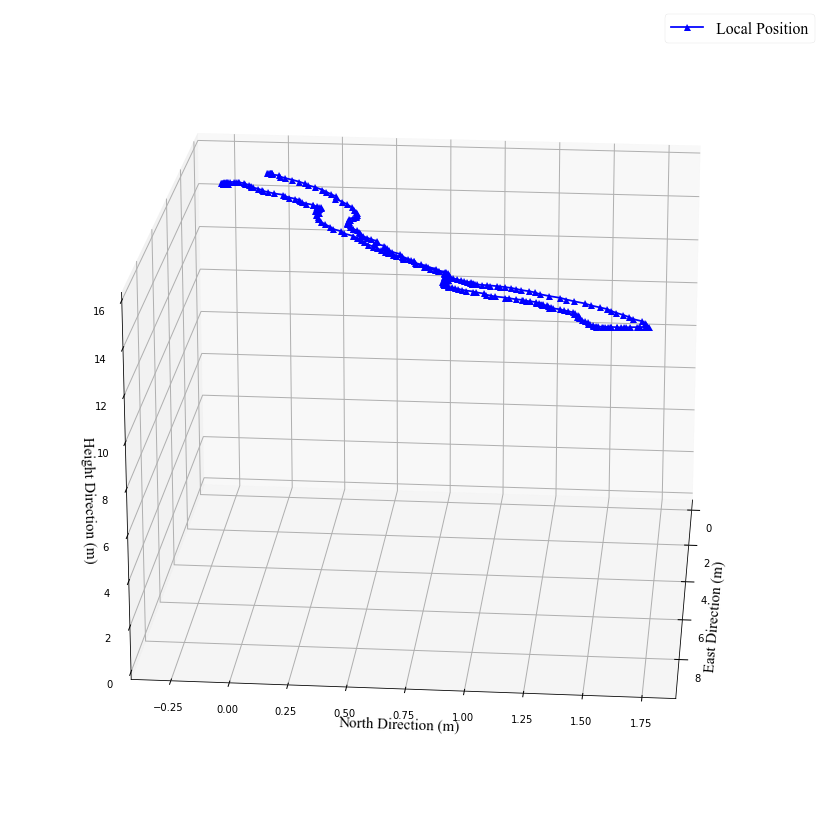

In [33]:
style.use('seaborn-notebook')

fig = plt.figure(figsize=[30,15])
ax = fig.gca(projection='3d')

# set figure information
# ax.set_title("M300 drone planned and real trajectory", fontsize=17)
ax.set_xlabel("East Direction (m)", font1)
ax.set_ylabel("North Direction (m)", font1)
ax.set_zlabel("Height Direction (m)",font1)
ax.set_zlim(0,16)
ax.view_init(20, 5)

# draw the figure, the color is r = read
p1 = ax.plot(east_real, north_real, up_real, c="b", label='Local Position', marker='^')
ax.legend( prop=font2)

# fig.colorbar(p2,label="Height")

plt.show()
fig.savefig('m300_n20T_local_pose.svg')